<a href="https://colab.research.google.com/github/rodolfostocker/Sprint_II_MVP_Part_B_DL_Classification/blob/main/MVP_Sprint_II_Part_B_RS_dete%C3%A7%C3%A3o_navios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### MVP Sprint II PUC Rio

Data Science & Analytics
ML & Analytics

Professores / monitores : D.Sc Hugo Villamizar / D.Sc Patrick Happ

Elaborado: Rodolfo Stocker




###### README MVP II, Parte B deteção de navios.

Previsão e decisão

A previsão é um elemento essencial para a tomada de decisões sob incerteza.

Muito do que acontece no dia a dia envolve alguma forma de previsão. Tais previsões diferem em um sentido, a saber, o grau de certeza que temos delas. Em algumas tarefas, elas não parecem ser previsões porque temos muita certeza delas. Em outras, não sabemos quase nada sobre elas, de modo que se tornam meras suposições.

Tudo isso depende de quão simples é a tarefa e, mais importante, de quanta bagagem temos com ela.

Para ilustrar isso, examinaremos um caso prático, usando as ferramentas e os recursos disponíveis.

ML e DL são duas técnicas de modelagem de dados usadas para previsão e tomada de decisões, com diversos modelos e aplicações. Nesse caso específico, a interpretabilidade é priorizada em relação à complexidade e ao desempenho computacionalmente demorado da implementação do modelo a ser usado.

Em resumo, o ML é uma técnica alinhada a modelos em que a interpretabilidade é importante e não possui um alto custo computacional de processamento dos dados , dependendo do vulume e complexidade dos dados. Já o DL se concentra no melhor desempenho dos resultados para obter previsões mais precisas. Ambas as técnicas são importantes e têm potencial para garantir uma análise de dados confiável e precisa.

As duas premissas centrais deste Notebook.

1 - Neste notebook, os dados serão carregados, transformados e analisados* para responder às perguntas apresentadas no próximo parágrafo.

2.- O escopo do MVP para o Sprint_II (atual) consiste na parte B, Machine Learning ML e análise dos dados (imagens) e na avaliação dos modelos  CNNs ou ConvNETs (CNN+DNN) para a classificação binária ou previsão de uma classe ou a estimaçao mas provávei desta, bem como a visualização desses resultados.

(*) note : Data profiling e Exploratory Data Analysis são duas técnicas de análise de dados. Em resumo, data profiling é uma técnica que se concentra o perfil dos dados, enquanto EDA se concentra na exploração dos dados para obter insights e hipóteses. Ambas as técnicas são importantes para garantir uma análise de dados confiável e precisa.


Elaborado: Rodolfo Stocker

Narrativa

Como entusiasta dos aplicativos GeoTech e GIS, percebi como o uso de alguns de suas aplicações pode contribuir e melhorar o gerenciamento de bens físicos ou de recursos industriais remotamente.

Com os avanços tecnológicos, tornou-se viável capturar imagens de satélite por meio de provedores de sensoriamento remoto. Com o uso dessas imagens de satélite, é possível monitorar bens físicos valiosos, como navios-tanque, tanques de armazenamento de diesel, pátios de minério e outros. Isso permite prever a oferta e fazer ajustes no mercado de commodities local, proporcionando informações valiosas para a tomada de decisões estratégicas, táticas e operacionais.

Ele também pode me ajudar a apresentar uma experiencia pratica representativa dos conhecimentos em VC aplicado a problemas reais de classificação binária e me manter no caminho certo para obter novos conhecimentos que agreguem valor à minha bagagem e redes neurais mais complexas e Visão Computacional

O conhecimento do domínio dos dados

A origem é a compreensão dos dados, Antes de se aprofundar em qualquer análise exploratória de dados, é preciso saber sobre a origem dos dados que estamos analisando. Entender como os dados foram coletados e processados.
Vamos responder as perguntas sobre o conjunto de dados:
1. Como foi coletado? Os dados foram obtidos da plataforma Kaggle .  O conjunto de dados consiste em imagens extraídas de imagens de satélite da Planet coletadas nas áreas da Baía de San Francisco e Baía de San Pedro, na Califórnia.
2. É uma amostra? Ele inclui 4000 imagens RGB de 80x80 pixels rotuladas como "navio" ou "sem navio" .
3. Foi corretamente amostrado? As imagens foram derivadas de produtos de cena visual em quadro completo da PlanetScope. E foram **ortorretificados** (* ver OBS) em um tamanho de pixel de 3 metros. **Por essa razão, não serão aplicadas técnicas avançadas data augmentations**
4. O conjunto de dados foi transformado de alguma forma? Iremos explorar na análise se as variáveis precisam ser transformadas (formatadas e ou normalizadas) .
5. Existem problemas conhecidos no conjunto de dados?
   Kaggle fornece um score de Usability 9.38, baseado em outras 3 métricas
* Completeness / Integridade : 100%
* Subtittle / Subtítulo : Ok
* Tag /Tag : Ok
* Description / Descrição : Ok
* Cover Image / Imagem capa : Ok
* Credibility /Credibilidade : 100%
* Source / Provenance : Não
* Public Notebook / Notebook Público: Ele é
* Update Frequency / Atualizações : Não. Irei criar uma atualizaçao.
* Compatibility /licença : 100%
* File Format / Formato arquivo : Se tem, ZIP.
* File Description : Não tem. Vamos criar um storytelling
* Column Description : tem disponível.

Conteúdo: no dataset original de Kaggle

É fornecido um diretório zipado shipsnet.zip que contém todo o conjunto de dados como imagens .png. Cada nome de arquivo de imagem individual segue um formato específico: label _ scene id _ longitude _ latitude.png

* label (rótulo): Valor 1 ou 0, representando a classe "navio" e a classe "sem navio", respectivamente.

* id da cena: O identificador exclusivo da cena visual do PlanetScope da qual a imagem foi extraída. O ID da cena pode ser usado com a API do Planet para descobrir e fazer download da cena inteira.

* longitude_latitude: As coordenadas de longitude e latitude do ponto central da imagem, com valores separados por um único sublinhado.

O conjunto de dados também é distribuído como um arquivo de texto formatado em JSON shipsnet.json. O objeto carregado contém dados, rótulo, scene_ids e listas de localização.

Os dados de valor de pixel para cada imagem RGB 80x80 são armazenados como uma lista de 19200 inteiros na lista de dados. As primeiras 6400 entradas contêm os valores do canal vermelho, as 6400 seguintes, o verde, e as 6400 finais, o azul. A imagem é armazenada na ordem principal da linha, de modo que as primeiras 80 entradas da matriz são os valores do canal vermelho da primeira linha da imagem.
Os valores da lista no índice i em labels, scene_ids e locations correspondem à i-ésima imagem na lista de dados.

Além disso na plataforma kaggle, consegue-se pré visualizar uma amostra do dataset e se percebe que é pesada, para alguma abordagem de  DL supervisionado do tipo Classificação, Trata-se de umas imagens  que poderiam ser trabalhadas para previsão de classes  para alguma métrica de interesse “Acúracia”, usando modelos mais complexos, a análise exploratórias ou EDA e a arquitetura do modelo de DL mas apropriado que poderiam ser resolvidos com algumas técnicas de CNN disponibilizadas na disciplinas de ML e analytics.

* OBS: Para mais detalhes sobre este dataset, consulte:
* Dados : https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery/code?select=shipsnet.json

* OBS: A ortorretificação de imagens em sensoriamento remoto é um processo que envolve a correção geométrica de uma imagem para remover distorções causadas pela inclinação do terreno ou a perspectiva da aeronave ou satélite que adquiriu a imagem. Esse procedimento é realizado para que a imagem resultante possa ser utilizada de forma precisa em aplicações que requerem informações espaciais exatas, como mapeamento, análise de terreno e monitoramento ambiental. A ortorretificação é fundamental para garantir a precisão e a qualidade dos dados em projetos de sensoriamento remoto.


##### 1.- Carregue as bibliotecas necessárias.

In [1]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Carrega librerias necessários.

import pandas as pd
import numpy as np
from numpy import expand_dims
import shutil
import random
import math

import zipfile
import json

from datetime import datetime
import itertools

# Carrega módulos para a visualização

import seaborn as sns
sns.set()

from matplotlib.colors import ListedColormap
import matplotlib.image as mpimg

# Carrega módulos para pre processamento
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Carrega módulos para algoritmos de machine learning

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Flatten
from keras import callbacks


# Carrega módulos para avaliar o desempenho

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Configuração para não exibir os warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################


# Importar o matplotlib, define os estilos e ignora avisos.

import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D

%matplotlib inline

import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.'))


# Verifica a versão da matplotlib instalada.
mpl.__version__

from IPython.display import display, Markdown


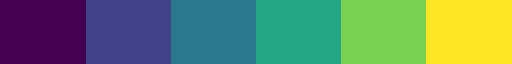

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [3]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Define uma  palleta de cores

# alternativa A: definição manual das cores a partir de uma lista de cores em hex
coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[3]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)


Confira a GPU utilizada.

In [4]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


/bin/bash: line 1: nvidia-smi: command not found


Confira a RAM utilizada.

In [5]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')


Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


##### 2.- Carregue os arquivos necessários.

Os códigos exibidos abaixo tem como propósito ter uma idéia dos dados e verificar se eles foram carregados corretamente. Isso permite inspecionar os nomes das colunas, os tipos de dados e potencialmente detectar quaisquer problemas ou inconsistências no conjunto de dados.

Importação dos arquivos do Github

In [6]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

url_git_cloned =  'https://github.com/rodolfostocker/Sprint_II_MVP_Part_B_DL_Classification.git'

!git clone https://github.com/rodolfostocker/Sprint_II_MVP_Part_B_DL_Classification.git

Cloning into 'Sprint_II_MVP_Part_B_DL_Classification'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 3
Receiving objects: 100% (9/9), 84.18 MiB | 23.31 MiB/s, done.


Carregamento e pré-visualização dos dados

In [7]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Especifique o caminho para o arquivo zipado

zip_path = '/content/Sprint_II_MVP_Part_B_DL_Classification/shipsnet.json (2).zip'

# Extract the JSON file from the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall()

# Carregar os dados JSON
with open('shipsnet.json') as data_file:
    dataset = json.load(data_file)

# Cria um DataFrame a partir dos dados JSON,
shipsnet = pd.DataFrame(dataset, columns=["data", "labels"])
shipsnet.head()


,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1


O código acima está carregando um arquivo JSON chamado shipsnet.json e armazenando seu conteúdo na variável dataset. Em seguida, é criado um DataFrame do pandas chamado shipsnet, o que permite uma manipulação e análise dos dados.

Para exibir as primeiras linhas do DataFrame, e fornecer uma visão geral do conjunto de dados. Isso pode ajudar a entender a estrutura e o conteúdo dos dados.

A saída de shipsnet será uma representação em forma de tabela do DataFrame, mostrando as primeiras linhas e colunas do conjunto de dados. Cada linha representa uma imagem e cada coluna representa um atributo ou característica associada às imagens. As colunas específicas e seus valores correspondentes dependerão da estrutura e do conteúdo do arquivo 'shipsnet.json'.

In [8]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

print(f"Temos um total de {len(shipsnet['data'])} imagens para o treinamento e avaliação do modelo de deep learning")

Temos um total de 4000 imagens para o treinamento e avaliação do modelo de deep learning


##### 3.- Profiling dos dados

Uma das primeiras etapas é determinar o perfil dos dados


Neste exercício e orientado ao problema a ser resolvido,  precisamos de apenas duas colunas, que são dados "data" e rótulos (labels), ja predefinidas acima da construção das colunas do conjunto de dados.

Determinaremos o número de linhas e colunas do DataFrame e o exibiremos, e então saberemos o resultado.

In [9]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Imprime o tamanho do dataset shipsnet
nRow, nCol = shipsnet.shape
print(f'O conjunto de dados tem {nRow} entradas e {nCol} colunas')


O conjunto de dados tem 4000 entradas e 2 colunas


O código mostrado abaixo tem o intuito de oferecer uma ideia dos dados e verificar se eles foram carregados corretamente. Isso permite que você inspecione os nomes das colunas, os tipos de dados e, possivelmente, detecte quaisquer problemas ou inconsistências no conjunto de dados.

Definiremos a função resumo_dl que recebera um DataFrame shipsnet como entrada.

Imprimiremos o título com o nome da tabela.

Preencheremos o DataFrame resumo_dl com as informações do dataset:
   - Atribuíremos os nomes das colunas do DataFrame  à coluna "Name".
   - Atribuíremos os tipos de dados das colunas do DataFrame  à coluna "dtypes".
   - Atribuíremos os valores das primeiras e ultimas três linhas.

Chamaremos a função resumo_ml() passando o DataFrame shipsnet como argumento para obter o resumo desejado.

In [10]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

def resumo_dl(df):
    # Imprime o título com o nome da tabela enumerada
    i = 1 # Número da Tabela
    print(f'Tabela {i}: informações do dataset shipsnet para o modelo de aprendizado profundo (classificação binaria)')

    # Cria um DataFrame vazio para armazenar o resumo
    resumo_dl = pd.DataFrame(columns=['Name', 'dtypes', 'First Value', 'Second Value', 'Third Value'])

    # Popula o DataFrame com informações do dataset
    resumo_dl['Name'] = shipsnet.columns
    resumo_dl['dtypes'] = shipsnet.dtypes.values
    resumo_dl['First Value'] = shipsnet.iloc[0].values
    resumo_dl['Second Value'] = shipsnet.iloc[1].values
    resumo_dl['Third Value'] = shipsnet.iloc[2].values
    resumo_dl['antepenultimate'] = shipsnet.loc[shipsnet.index[-3]].values
    resumo_dl['penultimate'] = shipsnet.loc[shipsnet.index[-2]].values
    resumo_dl['last_one'] = shipsnet.loc[shipsnet.index[-1]].values

    return resumo_dl

# Chamada da função resumo_ml com o DataFrame df_
resumo_dl(shipsnet)


Tabela 1: informações do dataset shipsnet para o modelo de aprendizado profundo (classificação binaria)


,Name,dtypes,First Value,Second Value,Third Value,antepenultimate,penultimate,last_one
0,data,object,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...","[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...","[125, 127, 129, 130, 126, 125, 129, 133, 132, ...","[171, 135, 118, 140, 145, 144, 154, 165, 139, ...","[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...","[122, 122, 126, 126, 142, 153, 174, 190, 185, ..."
1,labels,int64,1,1,1,0,0,0


In [11]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

print(f'A quantidade de pixels de cada imagem RGB de 80x80 está armazenado como uma lista de {len(shipsnet["data"].iloc[0])} números inteiros,\n dentro da lista de dados.')


A quantidade de pixels de cada imagem RGB de 80x80 está armazenado como uma lista de 19200 números inteiros,
 dentro da lista de dados.


Os primeiros 6400 elementos contêm os valores do canal vermelho, os próximos 6400 contêm os valores do canal verde e os últimos 6400 contêm os valores do canal azul.

###### Pré-processamento dos dados

A primeira etapa é determinar o balanceamento das classes.

Para determinar as proporções do conjunto de dados como porcentagem, o código é o seguinte:

Primeiro, estimamos o número total de imagens somando as contagens de rótulos. Em seguida, calculamos as proporções dividindo as contagens de imagens de navios e as imagens sem navios pelo número total de imagens e depois multiplicamos por 100 para obter a porcentagem.



In [12]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

sem_navio = shipsnet["labels"].value_counts()[0]

navio = shipsnet["labels"].value_counts()[1]

print(f'A quantidade de elementos da classe 0 é: {sem_navio} sem_navios e possui uma proporção equivalente a {(sem_navio/len(shipsnet))*100} %.')

print(f'A quantidade de elementos da classe 1 é: {navio} navios e possui uma proporção equivalente a {(navio/len(shipsnet))*100} %.')


A quantidade de elementos da classe 0 é: 3000 sem_navios e possui uma proporção equivalente a 75.0 %.
A quantidade de elementos da classe 1 é: 1000 navios e possui uma proporção equivalente a 25.0 %.


Em seguida, visualizamos as proporções em um gráfico de pizza simples.

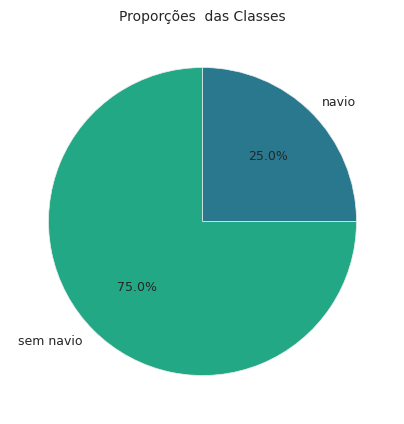

In [13]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Calcula as quantidades de cada classe

label_counts = shipsnet["labels"].value_counts()

ship_images = label_counts[1]

no_ship_images = label_counts[0]

total_images = label_counts.sum()

ship_label_percent = (ship_images / total_images) * 100
no_ship_label_percent = (no_ship_images / total_images) * 100


#  Calcule as proporções
proportions = [ship_label_percent, no_ship_label_percent]
labels = ['navio', 'sem navio']
colors = ['#2a788e', '#22a884']

plt.style.use('ggplot')

plt.figure(figsize=(5, 5))

# Create a pie chart
plt.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 9})

# Set plot title
plt.title('Proporções  das Classes', fontsize=10 )

# Display the plot
plt.show()

 Poderia ter sido realizado um subamostragem da classe maioritaria ou negativa (Downsampling ou Redução da amostragem):, no entanto, a quantidade de amostras não é suficiente para o treinamento, e não serão aplicadas técnicas de data augmentation, já que as fotos são ortoectificadas da fonte.

Outras técnicas poderiam ser utilizadas mais adiante como a validaçao cruzada

Em geral, a validação cruzada é uma prática recomendada para avaliar modelos de aprendizagem automática e profunda  e tornar esses modelos mais robusta e confiável, mas é sempre importante considerar as características específicas do conjunto de dados e o objetivo do projeto antes de decidir se essa é a abordagem mais adequada.

A validação cruzada é uma técnica útil para avaliar a capacidade de generalização do modelo, e faz sentido usar o método de validação cruzada em muitos cenários de aprendizagem profunda.  Ela pode ser usada em muitos cenários de aprendizagem profunda, garantindo que o desempenho seja avaliado de forma robusta e não esteja sujeito a flutuações ou variações nos dados de treinamento e teste.

Há vários motivos pelos quais a validação cruzada é benéfica:

1. Tamanho limitado do conjunto de dados,
2. Variabilidade dos dados,
3. Detecção de overfitting,
4. Seleção de hiperparâmetros.

Entretanto, nesse caso, talvez seja melhor não usar a validação cruzada pois, o conjunto de dados não balanceado nao e adecuando porque pode levar a estimativas distorcidas de desempenho, pois algumas classes podem estar sub-representadas em determinadas divisões.

###### Pré-processamento dos dados

Uma segunda etapa é transformar ou alterar e formatar os dados e os rótulos.

O  código embaixo converte as informações contidas no dicionário  em um multi dimensional arrays . Realiza essa conversão , em que a data  é convertido em um multi dimentinal array e atribuído à variável x , e os labels sao convertidos em outro array e atribuído à variável y.  

In [14]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

x = np.asarray(dataset['data'], dtype='uint8')
y = np.asarray(dataset['labels'], dtype='uint8')

O tipo de dados uint8 indica um número inteiro sem sinal e consiste em 8 bits com valores de intervalo positivo de 0 a 255.

Essa conversão para arrays é útil para facilitar operações numéricas e manipulação dos dados em uma estrutura mais eficiente para processamento posterior.

In [15]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Imprime o tamanho do bconjunto no dataset original

nRow, nCol = x.shape
print(f'Originalmente, o conjunto de dados possui {nRow} registros é {nCol} colunas ou atributos')

Originalmente, o conjunto de dados possui 4000 registros é 19200 colunas ou atributos


Essas duas variáveis de célula acima informam o tamanho do conjunto de dados em termos de linhas e colunas.


Com o intuito de facilitar o processamento mais eficiente dos dados de imagem.

A operação a seguir irá se reorganizar o arraglo original em uma nova forma, onde -1 indica que o tamanho dessa dimensão será calculado com base nas outras dimensões e nos dados existentes, e, em seguida, reorganizados em (n, dimensões, canais) com o método de transposição.

In [16]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape

(4000, 80, 80, 3)

O resultado é um novo tensor multidimensional (multi-dimentional matrix) com as 4 dimensões alteradas para (n, 80, 80, 3), onde n representa o número de registros (linhas) do tensor de 4 dimensões original.


A saída do  código está redimensionando. Esse novo shape é útil para trabalhar com imagens RGB de 80 x 80 pixels, organizadas em três canais (vermelho, verde e azul), permitindo um processamento mais eficiente e coerente com dados de imagem.

Um tensor com dimensões (n, 80, 80, 3) representa uma matriz multidimensional com quatro dimensões. Vamos analisar o significado de cada dimensão:

- n: Essa dimensão representa o número de amostras ou exemplos no conjunto
  de dados. Cada amostra pode ser considerada como uma instância individual de dados (imagem) . Por exemplo, se n = 4000, significa que existem 4000 amostras no conjunto de dados.
- 80: Essa dimensão representa a altura de cada amostra no conjunto de
  dados. Neste caso, cada amostra tem uma altura de 80 pixels.
- 80: Essa dimensão representa a largura de cada amostra no conjunto de  
  dados. Da mesma forma, cada amostra tem uma largura de 80 pixels.
- 3: Essa dimensão representa o número de canais de cor em cada amostra.
  Neste caso, cada amostra tem três canais de cor, geralmente representando vermelho, verde e azul (RGB).

Para visualizar esse tensor, você pode pensar nele como uma coleção de n imagens, onde cada imagem tem uma altura de 80 pixels, uma largura de 80 pixels e três canais de cor (RGB). O tensor pode ser usado para representar um lote de imagens ou qualquer outro tipo de dados que tenha dimensões semelhantes.

No aprendizado de máquina, esse tensor pode ser alimentado em um modelo de aprendizado profundo, como uma rede neural convolucional (CNN), para realizar tarefas como classificação de imagens. O modelo processará o tensor e aprenderá padrões e características dos dados para fazer previsões ou realizar a tarefa desejada.


Entanto o valor da saída depende do tamanho e da estrutura do array y, que é determinado pelos dados específicos do conjunto de dados utilizado.

A saída do código será uma tupla contendo o formato (shape) do array y. O formato é representado por uma sequência de números que indicam o tamanho em cada dimensão do array.

In [17]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

from tensorflow.keras.utils import to_categorical

y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

O código acima está aplicando  one-hot encoding aos valores do array y, convertendo-os em uma representação matricial binária de classes, ajustando a saida para um problema supervisionado de classificaçao binaria é irá transformá-los em vetores binários correspondentes à classe de cada registro.

A saída do código abaixo será uma tupla contendo o formato do array y_reshaped.

O valor exato dependerá do tamanho do array original y e do número de classes especificado, que neste caso é 2.

In [18]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

y_reshaped


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

A saída y_reshaped retorna uma amostra da estrutura resultante após a codificação one-hot. O formato será uma tupla que representa as dimensões do array (4000, 2), como indicado em y_reshaped , possui 4000 elementos em uma dimensão e 2 elementos na outra dimensão o número de classes.

##### 4.- EDA

Uma próxima etapa é a exploração e visualização dos dados

A saída do código  será uma figura com uma linha e oito subplots.

Os quatro primeiros subplots exibirão imagens rotuladas como "Not A Ship" (sem navio), enquanto os quatro últimos subplots mostrarão imagens rotuladas como "Ship" (navio).

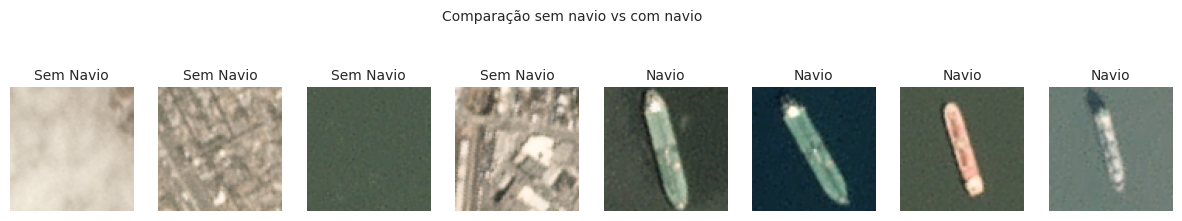

In [19]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Comparação sem navio vs com navio


imagem_sem_navio = x_reshaped[y==0]

imagem_navio = x_reshaped[y==1]


plt.style.use('ggplot')

def plot(imagem_sem_navio, imagem_navio):
    plt.figure(figsize=(15, 5))

    plt.suptitle('Comparação sem navio vs com navio', fontsize=10)  # Adicionando o título no topo da figura

    for i, k in enumerate(range(1, 9)):
        if i < 4:
            plt.subplot(1, 8, k)
            plt.title('Sem Navio', fontsize=10)
            plt.imshow(imagem_sem_navio[i + 2])
            plt.axis("off")
        else:
            plt.subplot(1, 8, k)
            plt.title('Navio', fontsize=10)
            plt.imshow(imagem_navio[i + 15])
            plt.axis("off")

    plt.subplots_adjust(bottom=0.3, top= 1.1, hspace=0.25)

# Implementação da função
plot(imagem_sem_navio , imagem_navio)


Em resumo, o resultado será uma apresentação visual de uma seleção de imagens rotuladas como navios e não navios, organizadas em uma grade de subparcelas para facilitar a comparação e a análise visual.

Visualização da Intensidade do pixel no subconjunto de dados da shipsnet

A imagem é dividida em um número de unidades ou pixels de tamanho igual. Cada pixel na imagem representa uma área discreta em sua amostra e tem um valor de intensidade associado.

Os histogramas de imagem são uma excelente ferramenta, com uma leitura simples, eles podem exibir contraste, brilho, distribuição de luz e a distribuição de "cores em uma imagem" no caso de não haver normalização. Eles são úteis para tarefas como a EDA para análise exploratória de dados em problemas que envolvem imagens.


O código cria uma figura com uma grade de subplots, onde cada subplot exibe uma imagem acompanhada do histograma de intensidade correspondente. A primeira linha de subplots mostra as imagens de navios, enquanto a segunda linha mostra as imagens de objetos que não são navios.

Os histogramas são gerados para cada canal de cor (vermelho, verde e azul) das imagens, com a intensidade de pixel representada no eixo x e a contagem no eixo y.

A saída do código será a exibição de imagens de navios (ship) e das imagens que não são navios (not_ship), juntamente com seus respectivos histogramas de intensidade de pixels.

Além disso, a saída também exibirá o valor mínimo e máximo de pixel para cada imagem, informando a faixa de intensidade de pixel presente nas imagens de navios e não navios.

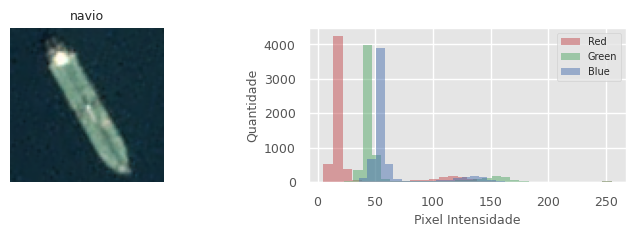

O valor mínimo de pixel dessa imagem: 5
O valor máximo de pixel dessa imagem: 255


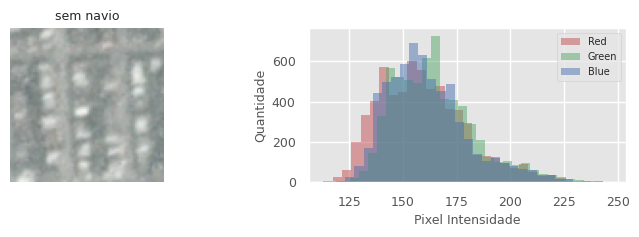

O valor mínimo de pixel dessa imagem: 113
O valor máximo de pixel dessa imagem: 247


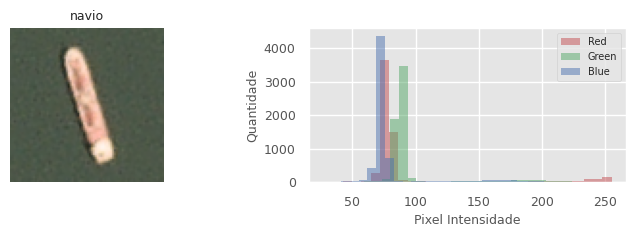

O valor mínimo de pixel dessa imagem: 27
O valor máximo de pixel dessa imagem: 255


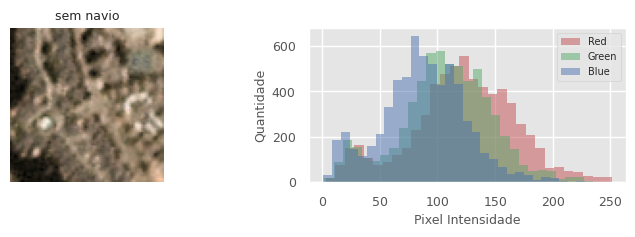

O valor mínimo de pixel dessa imagem: 1
O valor máximo de pixel dessa imagem: 251


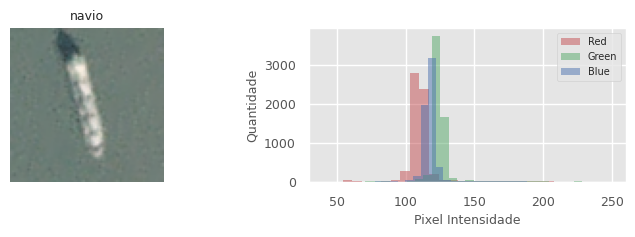

O valor mínimo de pixel dessa imagem: 40
O valor máximo de pixel dessa imagem: 250


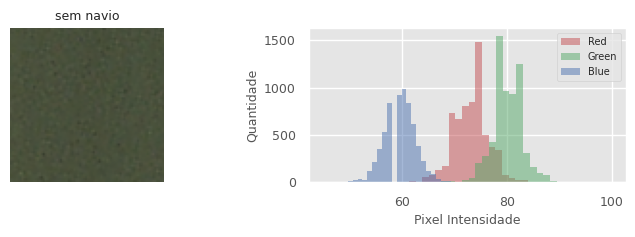

O valor mínimo de pixel dessa imagem: 45
O valor máximo de pixel dessa imagem: 100


In [20]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

label = ("Red", "Green", "Blue")

def plot_histogram(image, title):

    plt.figure(figsize=(9, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(title, fontsize=9)

    histo = plt.subplot(1, 2, 2)
    histo.set_ylabel('Quantidade', fontsize=9)
    histo.set_xlabel('Pixel Intensidade', fontsize=9)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)

    n_bins = 30
    colors = ['r', 'g', 'b']
    for i in range(3):
        plt.hist(image[:, :, i].flatten(), bins=n_bins, lw=0, color=colors[i], alpha=0.5)
        plt.legend(label, loc="upper right", fontsize=7)
    plt.show()

    print("O valor mínimo de pixel dessa imagem: {}".format(image.min()))
    print("O valor máximo de pixel dessa imagem: {}".format(image.max()))


for i in range(20, 23):
    navio_image = x_reshaped[y == 1][i]
    sem_navio_image = x_reshaped[y == 0][i]

    plot_histogram(navio_image, 'navio')
    plot_histogram(sem_navio_image, 'sem navio')



No geral, a saída do código fornecerá uma análise visual das imagens e de seus respectivos histogramas, permitindo uma compreensão melhor da distribuição dos valores de intensidade de pixel para navios e não navios.

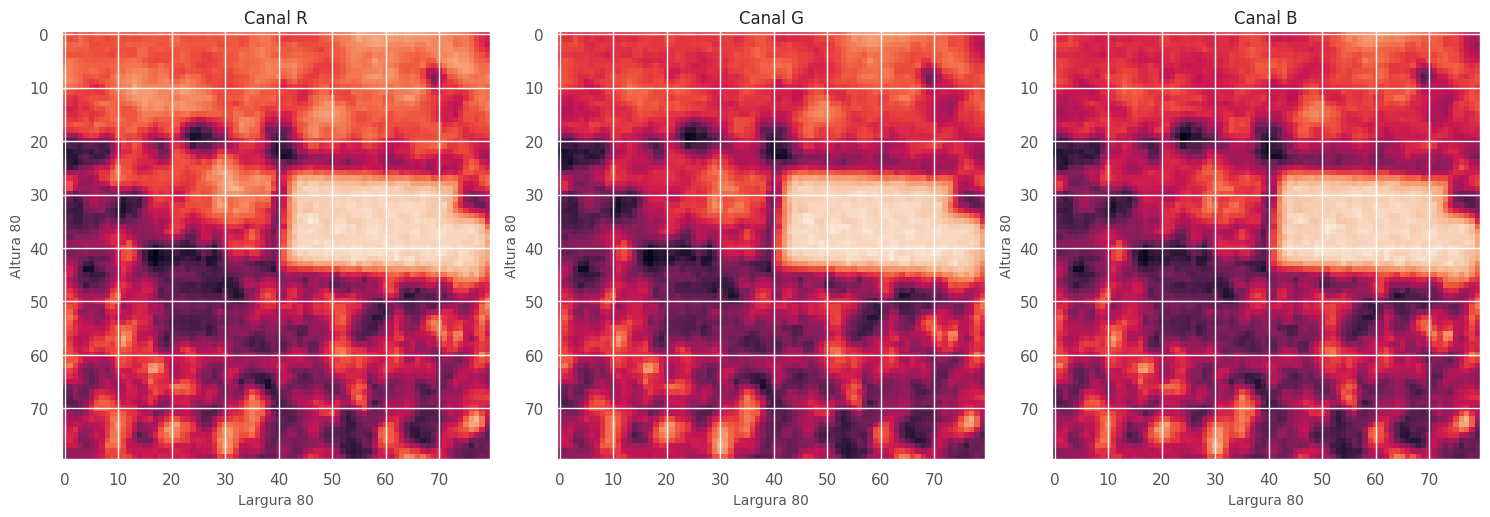

In [21]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

my_list = [(0, 'Canal R'), (1, 'Canal G'), (2, 'Canal B')]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


image = x_reshaped[y==0][6]

for i, (channel_idx, channel_label) in enumerate(my_list):
    ax = axes[i]
    ax.set_title(channel_label, fontsize = 12)
    ax.set_ylabel('Altura {}'.format(image.shape[0]), fontsize = 10)
    ax.set_xlabel('Largura {}'.format(image.shape[1]), fontsize = 10)
    ax.imshow(image[:, :, channel_idx])

plt.tight_layout()
plt.show()

Essa saída visualiza os canais RGB de cor (vermelho, verde e azul) da imagem selecionada, permitindo uma análise individual das informações de cor contidas em cada canal.

A saída do código apresenta uma análise visual das imagens e de seus respectivos canais RGB, facilitando a compreensão da variação dos valores de intensidade de pixel para navios e não navios em seus respectivos canais.

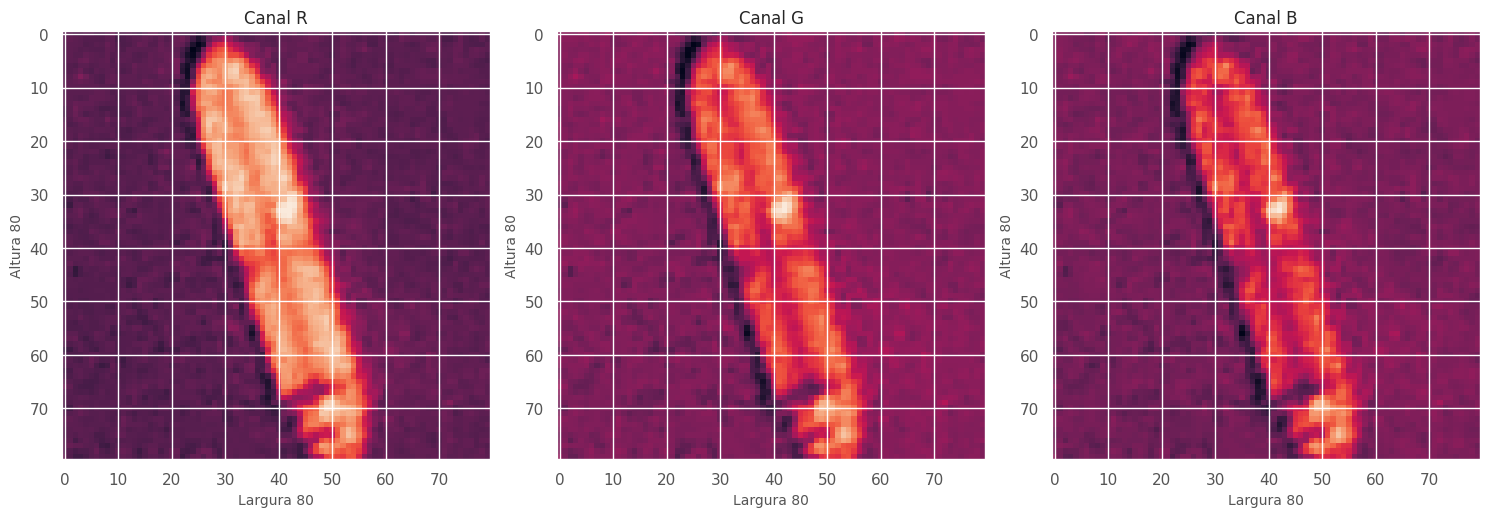

In [22]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

my_list = [(0, 'Canal R'), (1, 'Canal G'), (2, 'Canal B')]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

image = x_reshaped[y==1][7]

for i, (channel_idx, channel_label) in enumerate(my_list):
    ax = axes[i]
    ax.set_title(channel_label, fontsize = 12)
    ax.set_ylabel('Altura {}'.format(image.shape[0]), fontsize = 10)
    ax.set_xlabel('Largura {}'.format(image.shape[1]), fontsize = 10)
    ax.imshow(image[:, :, channel_idx])

plt.tight_layout()
plt.show()

In [23]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

print(f'A imagen amostrada do subconjunto possui as seguintes dimensões {image.shape} e um tamanho de pixels {image.size},\n e os valores de intensidade do pixel 0 nos canais RGB {image[0][0]}, respectivamente.')

A imagen amostrada do subconjunto possui as seguintes dimensões (80, 80, 3) e um tamanho de pixels 19200,
 e os valores de intensidade do pixel 0 nos canais RGB [111 117  97], respectivamente.


Distribuições de Intensidade de pixels RGB

Facilita a compreensão a distribuição de cores para identificar esses possíveis problemas antecipadamente, garantindo que o modelo seja treinado em um conjunto de dados consistente e representativo.

Para comparar as distribuições de intensidade RGB entre os conjuntos de treinamento e validação do conjunto de dados shipsnet,  podemos usar o código a seguir para criar gráficos separados de "Distribuição da intensidade das cores RGB":

Ao executar esse código, você obterá tres gráficos: . Cada gráfico representa a distribuição da intensidade RGB no respectivo canal. Esses gráficos fornecem informações sobre a distribuição das intensidades RGB nas imagens, permitindo que você analise as características de cor do conjunto de dados shipsnet.

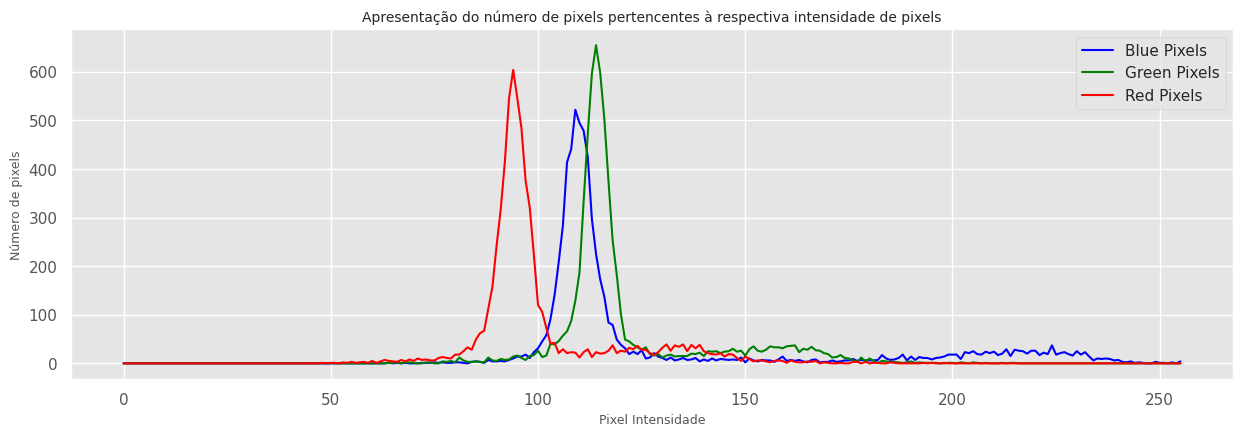

In [24]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

colors = ('blue','green','red')
label = ("Blue", "Green", "Red")

fig, axes = plt.subplots(1, figsize=(15, 5))

for count,color in enumerate(colors):
    histogram = cv2.calcHist([image],[count],None,[256],[0,256])
    plt.plot(histogram,color = color, label=label[count]+str(" Pixels"))

    plt.subplots_adjust(bottom=0.3, top=1, hspace=0.25)

plt.title("Apresentação do número de pixels pertencentes à respectiva intensidade de pixels", fontsize=10)
plt.ylabel("Número de pixels",fontsize=9)
plt.xlabel("Pixel Intensidade",fontsize=9)
plt.legend(numpoints=1, loc="best")
plt.show()



As distribuição de cores compara as distribuições de intensidade RGB de uma amostra ('image') representativa do conjunto de dados. Ele pressupõe a ordenação de canais RGB e mede a intensidade de cada canal de cor (variando de 0 a 255) em todas as imagens do conjunto de dados.

A análise da distribuição de cores revela discrepâncias nas características da imagem entre diferentes conjuntos de dados.
Uma diferença notável no valor médio de uma cor específica entre dois conjuntos de dados pode indicar um problema com a consistência dos dados ou com o processo de aumento.

###### Pré-processamento dos dados

Uma outra etapa é a normalização dos dados x.

In [25]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

x_reshaped_normalized = x_reshaped / 255


In [26]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

x_reshaped_normalized [0][0][0] # Normalized RGB values of the firs pixel of the first image in the dataset.


array([0.32156863, 0.36862745, 0.31372549])

Valores RGB normalizados a partir do primeiro pixel da primeira imagem no conjunto de dados.

Os histogramas de imagem são uma excelente ferramenta. Com uma simples leitura, eles podem exibir o contraste, o brilho, a distribuição de luz e a distribuição de 'cores em uma imagem' normalizada. Eles são úteis para tarefas como EDA para análise exploratória de dados em problemas que envolvem imagens.

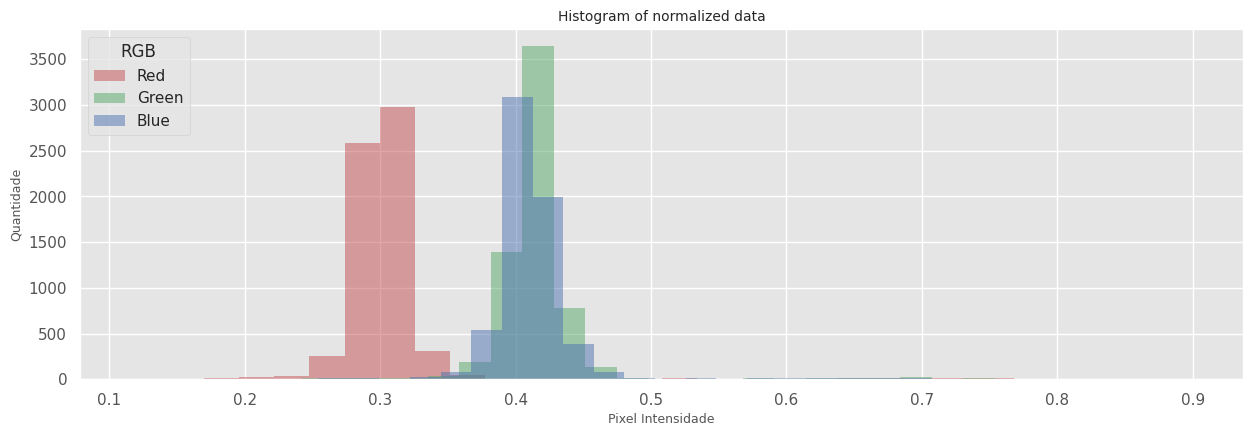

In [27]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

#figsize=(15, 5)
fig, axes = plt.subplots(1, figsize=(15, 5))
label = ("Red","Green","Blue")

n_bins = 30

plt.hist(x_reshaped_normalized[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped_normalized[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped_normalized[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);


plt.title("Histogram of normalized data",fontsize=10)
plt.ylabel('Quantidade', fontsize=9 )
plt.xlabel('Pixel Intensidade',fontsize=9 )


plt.subplots_adjust(bottom=0.3, top=1, hspace=0.25)
plt.legend(label, loc="upper left", title='RGB')

plt.show()

A saída do código fornecido será um histograma com três distribuições de intensidade de pixels correspondentes aos canais de cor (vermelho, verde e azul) da primeira imagem no conjunto de dados que pertence à classe “não navio” (y == 0).

Essa saída permite visualizar as distribuições de intensidade de pixels para cada canal de cor da primeira imagem na classe “não navio”, fornecendo insights sobre as características dos dados normalizados.

###### Pré-processamento dos dados

Preparação dos dados de treinamento,  validação e teste

Essas linhas de código exibiram o formato (ou o tamanho) dos conjuntos de dados resultantes após a divisão em treinamento, teste e validação. Os valores de “número de amostras de treinamento”, “número de amostras de teste” e “número de amostras de validação” são preenchidos com os valores correspondentes após a divisão dos dados.

In [28]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, test_size=0.25, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train shape: (2400, 80, 80, 3)
x_test shape: (800, 80, 80, 3)
y_train shape: (2400, 2)
y_test shape: (800, 2)
x_val shape: (800, 80, 80, 3)
y_val shape: (800, 2)


Essa saída fornece informações sobre as dimensões dos conjuntos de dados para verificar se a divisão foi feita corretamente e se o formato dos dados está de acordo com as expectativas.

Prepara os sub conjuntos de dados de teste para uma  avaliação posterior:

Seguindo essas etapas, você pode carregar o conjunto de dados de teste salvo e o modelo no notebook do Google Colab e avaliar o desempenho do modelo nos dados de teste.

In [29]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# salvando os dados

np.save('/content/x_test.npy', x_test)

np.save('/content/y_test.npy', y_test)

In [30]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

######################################### O arquivo x_test_loaded será usado na frente para avaliar o modelo carregado. #######################################

# carregando os dados

x_test_loaded = np.load('/content/x_test.npy')
y_test_loaded = np.load('/content/y_test.npy')


In [31]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

######################################### O arquivo x_test_loaded será usado na frente para avaliar o modelo carregado. #######################################

print("x_test loaded shape:", x_test_loaded.shape)
print("y_test loaded shape:", y_test_loaded.shape)

x_test loaded shape: (800, 80, 80, 3)
y_test loaded shape: (800, 2)


As células acima garantem que eu tenha o conjunto de dados de teste dividido preparado com elementos de entrada (x_test) e rótulos de destino correspondentes (y_test) para avaliar o desempenho do modelo CNNs salvo.

##### 5.- Implementação da CNN para a detecção de navios.

Definição da arquitetura do modelo:

Nesta etapa, é especificada uma camada convolucional 2D que possui 64 filtros e um tamanho de filtro de 4x4, utilizando a função de ativação ReLU. O parâmetro input_shape define a forma das imagens de entrada para a rede. Em seguida, são adicionadas camadas de max-pooling com a mesma função de ativação.

In [36]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

model = Sequential()

# Camadas convolucionais

model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu', input_shape=(80, 80, 3)))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(80, 80, 3)))
model.add(MaxPool2D(pool_size=(5, 5)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
#model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='relu'))
#model.add(Conv2D(filters=8, kernel_size=(2, 2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.25))


In [37]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Reduze as dimensões da camada anterior e converta os atributos 2D em elementos em 1D

model.add(Flatten())

#  Camadas densamente conectadas
model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
#model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))

#Camada na saída com função de ativação softmax para classificação binaria.
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))


O método summary é utilizado para exibir um resumo da arquitetura do modelo de rede neural convolucional e fully connected. Ele oferece uma representação concisa das camadas do modelo e seus parâmetros, incluindo o número de parâmetros treináveis e a forma de saída de cada camada. Isso permite uma visualização rápida e clara da estrutura do modelo e suas respectivas informações importantes.

Para descrever a finalidade das diferentes seções principais do modelo, foram adicionados comentários :

- As camadas convolucionais desempenham a extração de atributos aplicando filtros (kernel) às imagens de entrada, seguidas de max pooling para reduzir as suas dimensões espaciais e camadas Dropout para fins de regularização.
- A camada Flatten é usada para converter os mapas de recursos 2D em um vetor 1D para apresentar um vetor para as camadas densamente conectadas.
	- As camadas densamente conectadas são responsáveis pela classificação e capturam relações complexas nos dados.
	- A camada de saída usa ativação sigmoide ou **softmax** para classificação binaria.


Os bullets acima fornecem uma visão geral de alto nível da finalidade de cada seção do modelo, contribuindo para esclarecer sua funcionalidade e objetivo na arquitetura geral.

In [38]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# sumariza o modelo

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 64)        3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

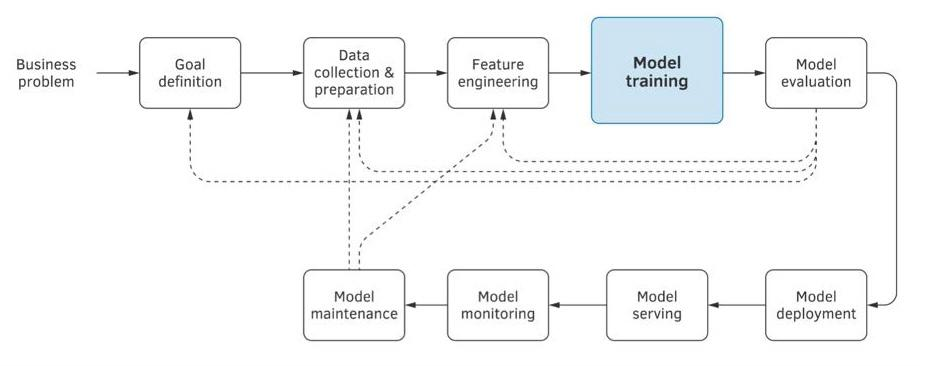

Descripçao de cada etapa da compilação e treinamento do modelo:

1. Compilação do modelo:
   - optimizer: O otimizador utilizado é o Adam, que é um algoritmo de otimização que ajusta a taxa de aprendizado de forma adaptativa para cada parâmetro do modelo. Os hiperparâmetros learning_rate, beta_1 e beta_2 são configurados para controlar a taxa de aprendizado e os decaimentos dos momentos de primeira e segunda ordem, respectivamente.
   - loss: A função de perda utilizada é a categorical_crossentropy, que é comumente usada para problemas de classificação com mais de duas classes. Ela compara a distribuição de probabilidade predita com a distribuição de probabilidade real (one-hot encoding) e calcula o erro de classificação.

2. Callback de parada antecipada:
   - callbacks.EarlyStopping: É um callback que monitora a perda (val_loss) durante o treinamento do modelo na validação (conjunto de validação). Se a perda não melhorar por um determinado número de épocas (patience), o treinamento é interrompido precocemente (restore_best_weights=True) e os pesos do modelo são restaurados para aqueles que obtiveram a menor perda na validação. Essa técnica é útil para evitar o overfitting, pois evita que o modelo continue treinando quando não está mais melhorando no conjunto de validação.

3. Treinamento do modelo:
   - model.fit: É o método usado para treinar o modelo com os dados de treinamento. Os argumentos fornecidos são:
     - x_train e y_train: Os dados de treinamento e seus respectivos rótulos.
     - epochs: O número de épocas de treinamento, ou seja, quantas vezes o modelo passará por todo o conjunto de treinamento.
     - validation_data: O conjunto de validação, que é usado para avaliar o desempenho do modelo em dados não vistos durante o treinamento.
     - shuffle: Um parâmetro booleano que indica se os dados de treinamento devem ser embaralhados a cada época. No código, ele é definido como True, o que significa que os dados serão embaralhados antes de cada época.
     - callbacks: Uma lista de callbacks que serão executados durante o treinamento. Neste caso, o callback de parada antecipada definido anteriormente será utilizado.

A saída do código abaixo será a execução do treinamento do modelo de rede neural convolucional (CNNs) usando os conjuntos de treinamento e validação fornecidos.

Durante o treinamento, o modelo passará por várias épocas, ajustando os pesos das camadas para melhorar a precisão da classificação. Serão exibidos os valores de perda e métricas de precisão para o conjunto de treinamento e validação a cada época.

Além disso, a implementação do callback EarlyStopping permitirá interromper o treinamento antecipadamente se a perda de validação não melhorar após um determinado número de épocas.

In [34]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Compilação do modelo

optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callback de parada antecipada para evitar o superajuste ou overfitting.
early_stopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), shuffle= bool = True, callbacks=[early_stopping])


Epoch 1/100
75/75 [==============================] - 17s 198ms/step - loss: 7.2879 - accuracy: 0.6467 - val_loss: 0.6715 - val_accuracy: 0.7475
Epoch 2/100
75/75 [==============================] - 16s 215ms/step - loss: 0.6471 - accuracy: 0.7008 - val_loss: 0.6582 - val_accuracy: 0.7513
Epoch 3/100
75/75 [==============================] - 14s 192ms/step - loss: 0.5990 - accuracy: 0.7242 - val_loss: 0.6272 - val_accuracy: 0.7513
Epoch 4/100
75/75 [==============================] - 14s 185ms/step - loss: 0.5591 - accuracy: 0.7437 - val_loss: 0.5924 - val_accuracy: 0.7513
Epoch 5/100
75/75 [==============================] - 14s 185ms/step - loss: 0.5348 - accuracy: 0.7513 - val_loss: 0.5294 - val_accuracy: 0.7513
Epoch 6/100
75/75 [==============================] - 14s 187ms/step - loss: 0.4755 - accuracy: 0.7696 - val_loss: 0.4220 - val_accuracy: 0.7987
Epoch 7/100
75/75 [==============================] - 14s 186ms/step - loss: 0.4562 - accuracy: 0.7900 - val_loss: 0.4343 - val_accuracy:

O código acima compila o modelo, define o otimizador, a função de perda e as métricas de avaliação. Em seguida, treina o modelo usando os dados de treinamento e valida o desempenho em um conjunto de validação. O treinamento é interrompido precocemente se a perda no conjunto de validação não melhorar após um certo número de épocas, ajudando a evitar o overfitting e obter um modelo mais generalizado.

A saída também pode incluir informações sobre o progresso do treinamento, como o número da época atual, a perda e a acurácia do treinamento e validação em cada época.

Ao final do treinamento, teremos o histórico de métricas e valores de perda, que podem ser usados para avaliar o desempenho do modelo e fazer análises adicionais, como plotar gráficos de aprendizado e avaliar a convergência do modelo.

Essa saída é importante para acompanhar o progresso do treinamento do modelo e obter informações sobre seu desempenho e capacidade de generalização, que serão apresentadas nas células a seguir.

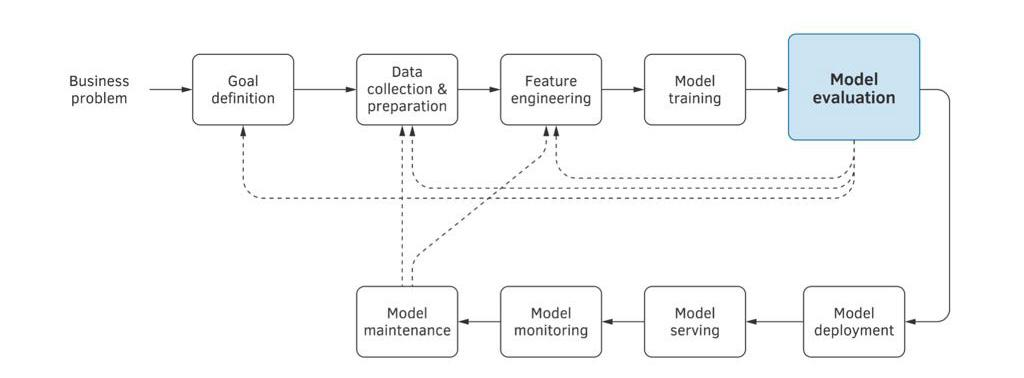

In [35]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################
model.evaluate(x_test, y_test)

25/25 [==============================] - 1s 45ms/step - loss: 0.0871 - accuracy: 0.9800


[0.08709770441055298, 0.9800000190734863]

In [36]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################
prediction = model.predict(x_test)
pd.Series(prediction[7], index=["sem navio", "navio"])

25/25 [==============================] - 1s 47ms/step


sem navio    0.001788
navio        0.998212
dtype: float32

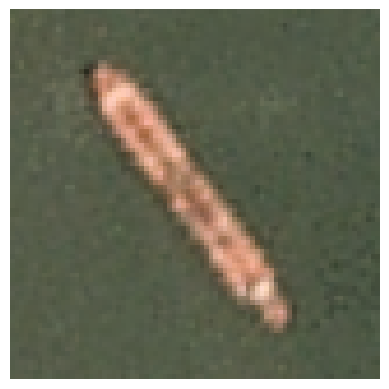

In [37]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################
plt.imshow(x_test[7])
plt.axis("off")
plt.show()


O proposito do código abaixo incluirá o seguinte:

1. Acuracia de conjunto de validação ( Val. Accuracy Score) : Representa uma porcentagem de amostras classificadas corretamente e a pontuação de acurácia do modelo para conjunto de validação .

2. Gráficos de Acurácia de Validação, Acurácia de Treinamento e Perda no conjunto de Teste: Esses gráficos mostrarão a tendência da acurácia de validação, acurácia de treinamento e perda de teste ao longo das épocas. O gráfico de acurácia de validação indica o desempenho do modelo no conjunto de validação durante o treinamento, enquanto o gráfico de acurácia de treinamento mostra a acurácia alcançada no conjunto de treinamento. O gráfico de perda de teste exibe o valor de perda no conjunto de teste.

3. Matriz de Confusão: É uma representação em forma de mapa de calor da matriz de confusão, que fornece uma visão geral do desempenho do modelo em termos de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. A matriz é anotada com valores e visualizada usando uma escala de cores, onde cores mais claras indicam valores mais altos.

25/25 [==============================] - 2s 80ms/step

Test Accuracy Score: 0.98


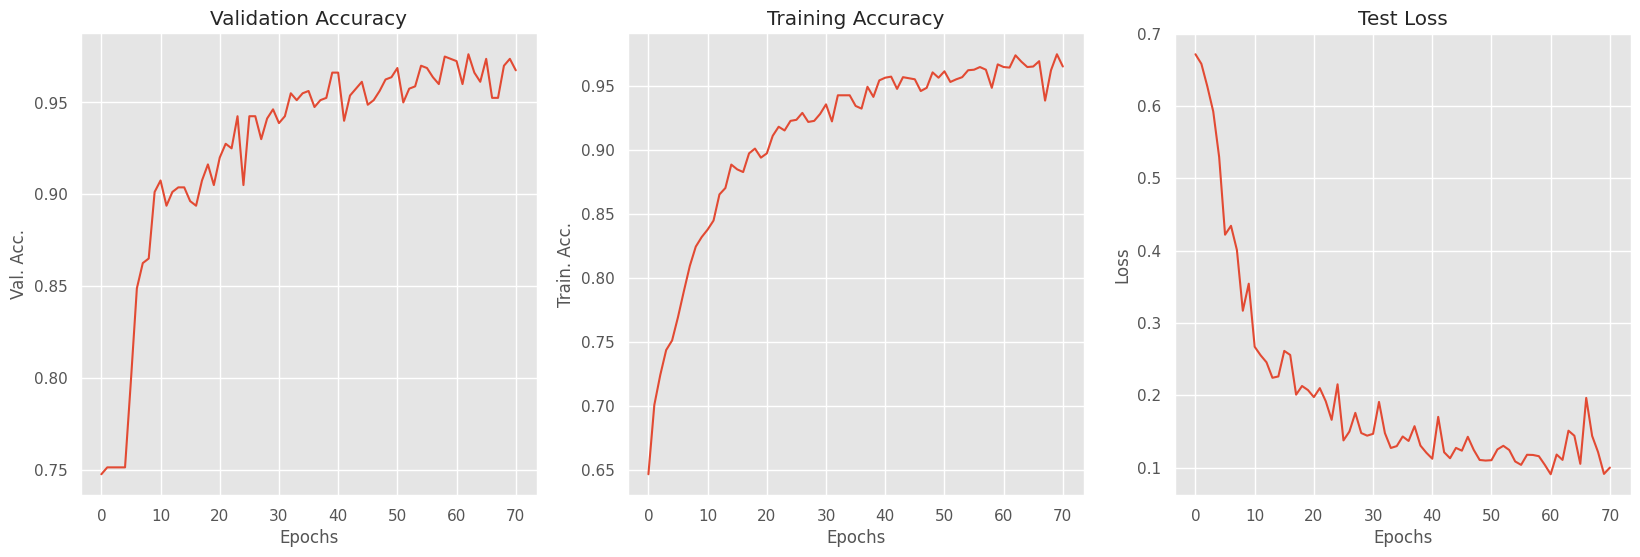

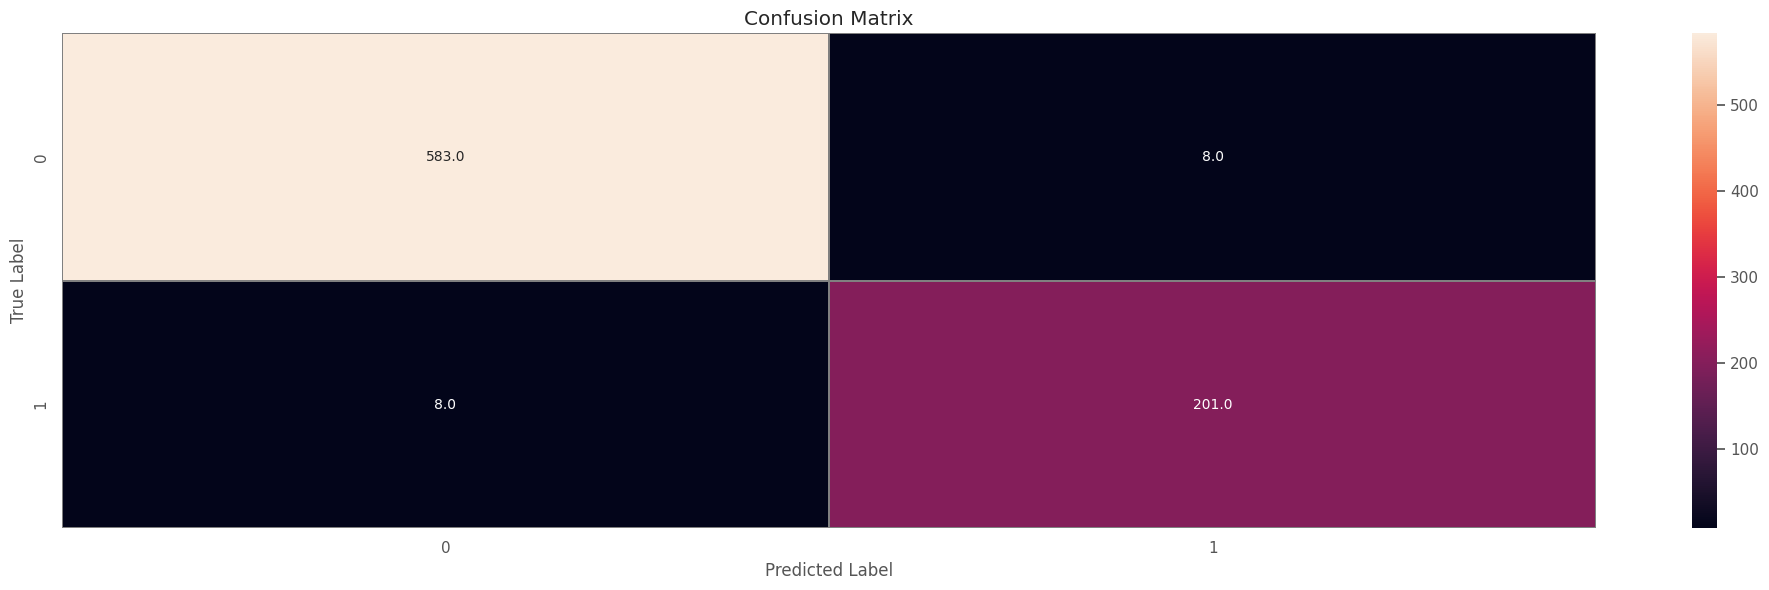

In [38]:

############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

accuracy_score = metrics.accuracy_score(Y_true, Y_pred_classes)
print("\nTest Accuracy Score:", accuracy_score)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].plot(history.history['val_accuracy'], label='val_acc')
axes[0].set_title("Validation Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Val. Acc.")
axes[1].plot(history.history['accuracy'], label='acc')
axes[1].set_title("Training Accuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Train. Acc.")
axes[2].plot(history.history['val_loss'], label='val_loss')
axes[2].set_title("Test Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")

plt.show()

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(20, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, linecolor="gray", fmt='.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()

O Test Accuracy Score é útil para avaliar o desempenho geral do modelo, enquanto os gráficos de acurácia e perda auxiliam na análise do progresso do aprendizado do modelo durante o treinamento. A Matriz de Confusão ajuda a analisar a capacidade do modelo de prever corretamente cada classe e identificar quaisquer padrões de classificação incorreta.

Essas saídas fornecem insights valiosos sobre o desempenho do modelo e podem auxiliar na tomada de decisões sobre otimização adicional ou ajustes para melhorar a acurácia e eficácia do modelo.

Quando os custos de falsos positivos e falsos negativos são iguais, você pode utilizar métricas como a acurácia (accuracy), a precisão (precision), o recall (revocação) e a medida F1 (F1-score) para avaliar o desempenho do seu modelo de classificação.

1. Acurácia (Accuracy): A acurácia é a proporção de exemplos classificados corretamente em relação ao total de exemplos. É uma métrica geral que mede a taxa de acertos do modelo, considerando tanto os verdadeiros positivos quanto os verdadeiros negativos. "A acurácia pode ser usada quando os custos de falsos positivos e falsos negativos são iguais".

2. Precisão (Precision): A precisão mede a proporção de exemplos classificados como positivos que são verdadeiramente positivos em relação ao total de exemplos classificados como positivos. É uma métrica que avalia a capacidade do modelo de evitar falsos positivos. "A precisão pode ser útil quando os falsos positivos têm um impacto negativo maior do que os falsos negativos".

3. Recall: O recall mede é calculada como a razão entre o número de amostras positivas classificadas corretamente como positivas e o número total de amostras positivas. Orecall mede a capacidade do modelo de detectar amostras positivas. Quanto maior e, mais amostras positivas são detectadas. "O recall pode ser útil quando os falsos negativos têm um impacto negativo maior do que os falsos positivos".

4. **Medida F1 (F1-Score)**: A medida F1 combina a precisão e o recall em uma única métrica, levando em consideração tanto os verdadeiros positivos quanto os falsos negativos. É a média harmônica da precisão e do recall, fornecendo uma medida balanceada entre as duas métricas. A medida F1 é útil quando você deseja considerar tanto a precisão quanto o recall de forma equilibrada.

É importante escolher as métricas de acordo com o contexto do problema e os custos associados a falsos positivos e falsos negativos. Você pode ajustar o limiar de classificação para otimizar as métricas de acordo com suas necessidades específicas.

In [39]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

from sklearn.metrics import classification_report
target_names = ['0' ,'1']
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       591
           1       0.96      0.96      0.96       209

    accuracy                           0.98       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.98      0.98      0.98       800



Com base nos resultados das métricas de classificação fornecidas, podemos tirar as seguintes conclusões:

1. Classe 0:
   - A classe 0 apresenta alta precisão (0.99), o que indica que a maioria das amostras classificadas como pertencentes a essa classe realmente são da classe 0.
   - O recall para a classe 0 é alta (0.99), o que significa que o modelo é capaz de identificar corretamente a maioria das amostras da classe 0.
   - O F1-Score para a classe 0 é de 0.99, o que é uma medida equilibrada de precisão e recall.
   - O suporte (número de amostras) para a classe 0 é de 591.

2. Classe 1:
   - A classe 1 apresenta uma boa precisão (0.96), indicando que a maioria das amostras classificadas como pertencentes a essa classe realmente são da classe 1.
   - O recall para a classe 1 é de 0.96, o que significa que o modelo identifica corretamente a maioria das amostras positivas da classe 1.
   - O F1-Score para a classe 1 é de 0.96, que é uma medida equilibrada de precisão e recall.
   - O suporte para a classe 1 é de 209.

3. Acurácia (Accuracy):
   - A acurácia geral do modelo é de 0.98, o que indica que o modelo classifica corretamente 98% das amostras.

4. Médias (macro avg e weighted avg):
   - As médias das métricas (precisão, recall e F1-Score) para todas as classes têm valores em torno de 0.97, o que demonstra um bom desempenho médio geral do modelo.
   - O suporte (número de amostras) para ambas as médias é de 800, considerando todas as classes.

Em resumo, o modelo obteve resultados positivos nas métricas de classificação, com alta precisão e recall para as duas classes. Isso indica que o modelo é capaz de realizar uma boa classificação das imagens com relação à presença ou ausência de navios. A acurácia geral do modelo é alta, indicando que ele possui um bom desempenho global na tarefa de classificação.

A saída do código abaixo é um gráfico da Curva ROC (Receiver Operating Characteristic) acompanhado com o valor da área abaixo a Curva (AUC, do inglês Area Under the Curve).

A Curva ROC é uma representação gráfica do desempenho do modelo de classificação em vários limiares de classificação. Ela traça a taxa de verdadeiros positivos (sensibilidade) em relação à taxa de falsos positivos (1-especificidade) para diferentes valores de limiar. A curva fornece informações sobre a capacidade do modelo de distinguir entre as classes positiva (0= não navio) e negativa (1= navio ).

O gráfico é uma representação da Curva ROC como uma linha continua. A linha representa o desempenho do modelo, sendo que um ponto mais alto na curva indica um melhor desempenho. A Área abaixo da Curva (AUC) é uma métrica que quantifica o desempenho geral do modelo. Um valor de AUC mais alto (mais próximo de 1,0) indica um melhor desempenho de classificação.

O gráfico também incluirá uma linha tracejada representando o desempenho de um modelo de suposição aleatória. Se a Curva ROC estiver próxima dessa linha de referencia  aleatória, sugere que o desempenho do modelo não é muito melhor do que o de um palpite aleatório.

25/25 [==============================] - 1s 45ms/step


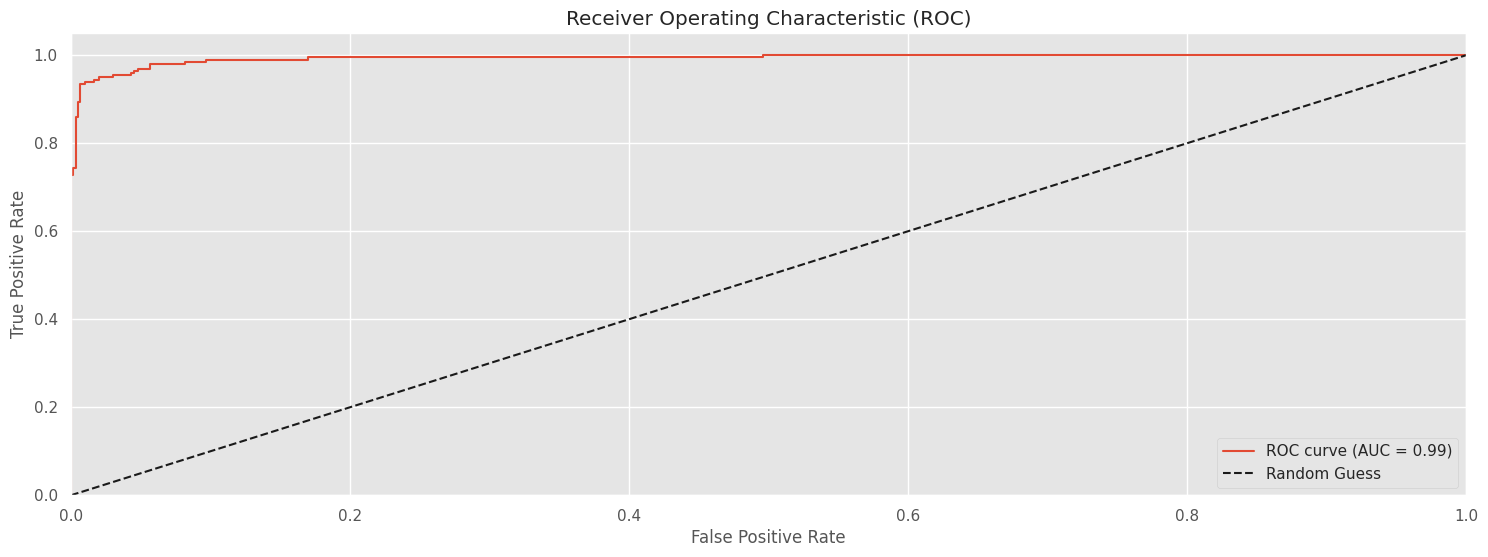

In [40]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

from sklearn.metrics import roc_curve, auc


# y_pred = (y_pred > 0.5)

# Make predictions on the validation set
y_pred = model.predict(x_val)
#y_pred = model.predict(x_test)

# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_val[:, 1], y_pred[:, 1])

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(18, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Em resumo, o gráfico fornece uma representação visual do desempenho do modelo em termos de sensibilidade e especificidade, permitindo avaliar o desempenho de classificação do modelo de CNN.

A AUC é apropriada para conjuntos de dados desbalanceados?
AUC (Area Under the Curve) é comumente usado como uma métrica de desempenho em problemas de classificação binária. É especialmente útil quando a distribuição das classes é desequilibrada ou quando.

Embora amplamente utilizado, o ROC AUC não é isento de problemas. Para a classificação desequilibrada com uma distorção grave e poucos exemplos da classe minoritária, o ROC AUC pode ser enganoso.

AUC mede a capacidade do modelo de classificação em distinguir entre as classes positiva e negativa, independentemente do limiar de classificação. Ele calcula a área sob a curva ROC (Receiver Operating Characteristic), que traça a taxa de verdadeiros positivos em função da taxa de falsos positivos em diferentes limiares de classificação.

Uma pontuação AUC igual a 1 indica que o modelo é capaz de classificar perfeitamente os exemplos, enquanto uma pontuação AUC igual a 0,5 indica um desempenho aleatório, onde o modelo não tem capacidade de distinguir entre as classes.

Portanto, o AUC é usado como uma medida de qualidade do modelo de classificação, fornecendo uma visão geral de seu desempenho em termos de discriminação entre classes.

In [41]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

auc = roc_auc_score(Y_true, Y_pred_classes)

print(f'O modelo CNN-DNN possui uma AUC {round(auc,3)} e escolhido em virtude por oferecer melhor generalização.')


O modelo CNN-DNN possui uma AUC 0.974 e escolhido em virtude por oferecer melhor generalização.


Com base nos resultados da avaliação dos modelos, podemos concluir que a métrica AUC (Area Under the Curve) é uma medida importante para avaliar o desempenho dos modelos de classificação. Valores mais próximos de 1 indicam um melhor desempenho na separação das classes.

In [42]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ####################################################

prediction = model.predict(x_test)
pd.Series(prediction[5], index=["sem navio", "navio"])
predicted_data = pd.DataFrame(prediction, columns=["sem navio", "navio"])
y_test_data = pd.DataFrame(y_test, columns=["sem navio", "navio"])
predicted_data['Há um navio'] = y_test[:, 1]
predicted_data["Difference"] = predicted_data["navio"] - predicted_data["Há um navio"]



25/25 [==============================] - 1s 47ms/step


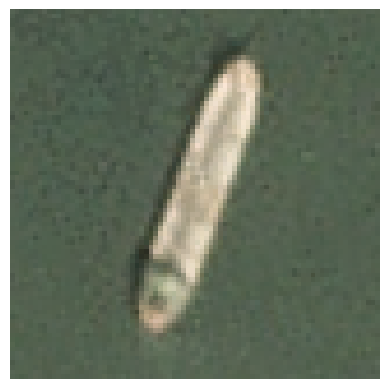

In [43]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

plt.imshow(x_test[5])
plt.axis("off")
plt.show()

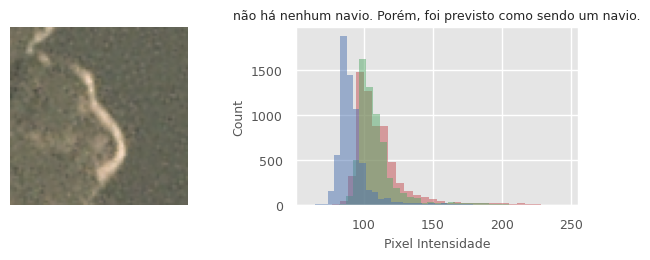

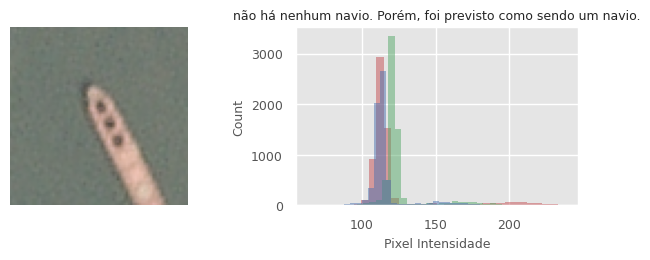

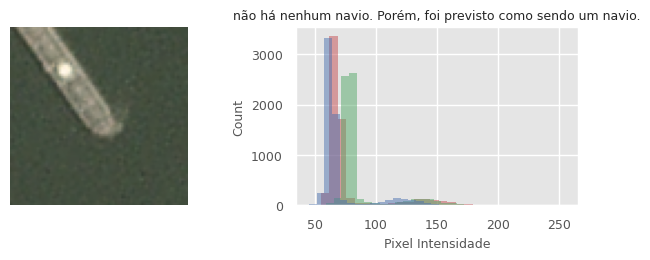

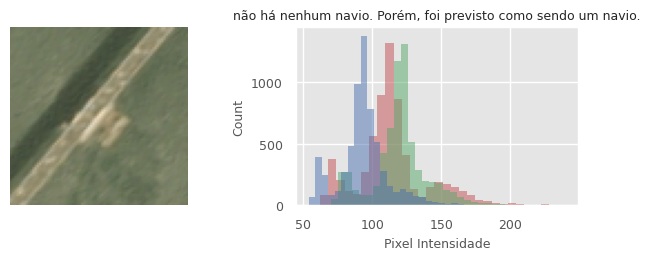

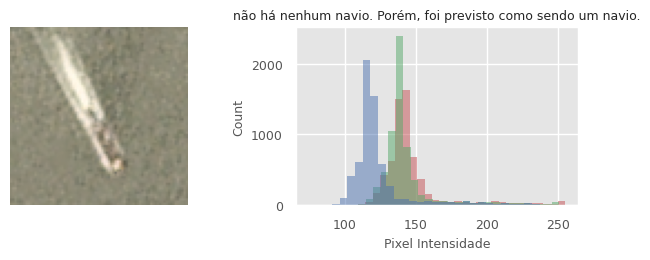

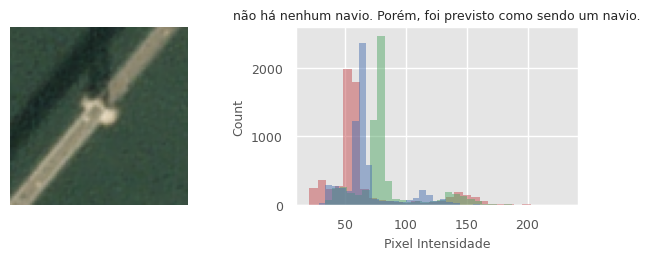

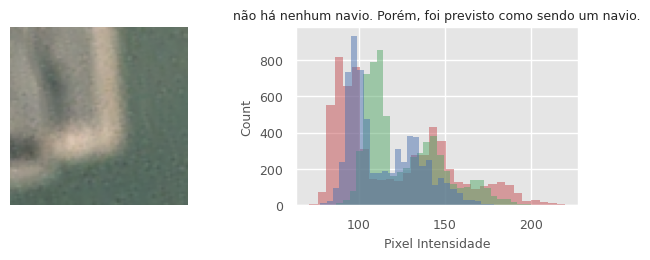

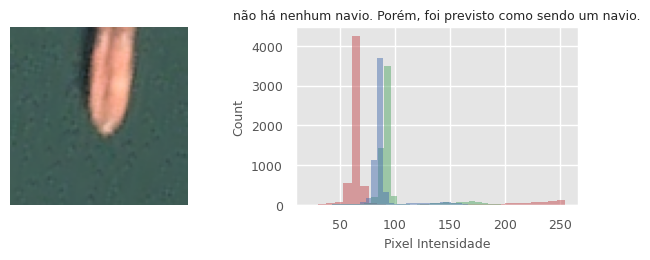

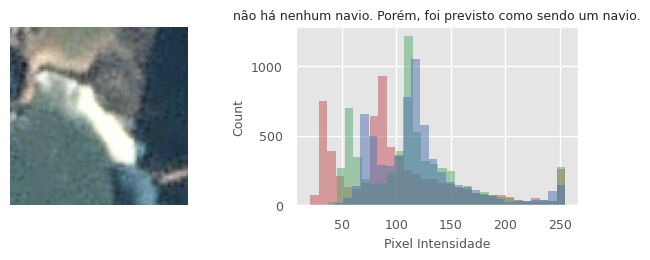

In [44]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

indexes = predicted_data.sort_values('Difference', ascending=False).head(9).index.tolist()


def plot_histogram(image):
    plt.figure(figsize=(8, 5))
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    histo = plt.subplot(2, 2, 2)
    histo.set_ylabel('Count', fontsize=9)
    plt.yticks(fontsize=9)
    histo.set_xlabel('Pixel Intensidade', fontsize=9)
    plt.xticks(fontsize=9)

    n_bins = 30
    colors = ['r', 'g', 'b']
    for i in range(3):
        plt.hist(image[:, :, i].flatten(), bins=n_bins, lw=0, color=colors[i], alpha=0.5)

    plt.subplots_adjust(bottom=0.3, top=1.1, hspace=0.25)


# Execução da função
for i in indexes:
    plot_histogram(x_test[i])
    plt.title('não há nenhum navio. Porém, foi previsto como sendo um navio.', fontsize=9)
    plt.show()

##### 6.- Conclusão:

A técnica explorada acima é comumente usada para obter a previsão de uma classe ou para a classificação de um objeto (image).

Primeiro, formulamos o necessário para um problema de aprendizado supervisionado que recebe nossos objetos (imagens) como entrada e gera uma previsão (probabilidade - binaria) como saída.
Em seguida, construímos um conjunto de dados rotulado (*) e treinamos um modelo de rede neural que resolve nosso problema de aprendizado supervisionado.
Em seguida, usamos as saídas de uma das camadas totalmente conectadas próximas à camada de saída do modelo de rede neural (antes da não-linearidade) como embeddings do objeto de entrada.

Nesse caso, temos uma rede neural convolucional (CNNs ) profunda com três camadas totalmente conectadas próximas à saída. A rede neural foi treinada para prever o objeto representado na imagem (navio). Para obter uma embedding de uma imagem não utilizada para treinar o modelo, enviamos essa imagem (geralmente representada como três matrizes de pixels, uma para cada canal R, G e B) para a entrada da rede neural e, em seguida, usamos a saída de uma das camadas totalmente conectadas antes da não-linearidade. Qual das camadas totalmente conectadas é melhor vai depender da tarefa que se deseja resolver e deve ser decidida experimentalmente ate alcançar a especificação ou superar a linha base para alguma métrica acurácia ou AUC.

Seguindo a abordagem acima, podemos treinar embedding de qualquer tipo. O analista de dados só precisa descobrir três coisas:

• Qual problema de aprendizado supervisionado resolver no case para imagens, classificação de objetos (navio),

• como representar a entrada para a rede neural para imagens, matrizes de pixels 80 x 80, uma para cada canal cor ( multi- dimensional tensor como altura e comprimento , uma matriz por cada  um dos 3 canais RGB, e,

• qual será a arquitetura da rede neural antes das camadas totalmente conectadas (para imagens, geralmente uma CNNs profunda).

As iterações de teste usados para avaliar o modelo devem permitir a descoberta de comportamentos errôneos antes que o modelo entre em produção.
Quando medimos a qualidade do modelo de acordo com alguma métrica de desempenho, como acurácia ou AUC, avaliamos sua propriedade
correctness, quando  o modelo está correto com relação a uma especificação se ele se comportar conforme especificado.
. Além dessa propriedade comumente avaliada do modelo, pode ser apropriado avaliar outras propriedades do modelo, como robustez e confiabilidade  (robustness and fairness).

*nota:  Para treinar modelos em aprendizado de máquina se refere ao processo de dividir um conjunto de dados em subconjuntos para fins de treinamento, validação e teste. Tipicamente, o conjunto de dados é dividido em um conjunto de treinamento, um conjunto de validação (opcional) e um conjunto de teste. O conjunto de treinamento é usado para treinar o modelo, o conjunto de validação é usado para ajustar hiperparâmetros e avaliar o desempenho do modelo durante o treinamento, e o conjunto de teste é usado para avaliar o desempenho final do modelo em dados não vistos.
O objetivo da amostragem de divisões em aprendizado de máquina é garantir que o modelo seja treinado e avaliado em diferentes subconjuntos de dados para avaliar sua capacidade de generalização. As divisões não são criadas por meio de amostragem com reposição, mas sim por meio de uma partição aleatória ou predefinida do conjunto de dados.



##### 7.- Exportação do modelo de deep learning para posterior uso

Salvando o modelo de deep learning que foi treinado

In [46]:
############################################ NÃO EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################
#from datetime import datetime

# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
format = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(format)

path_model = 'datasets/ships_vs_no_ships/trained_models'


#name_model = 'trained_model_'+'MVP_Sprint_II_Part_B_RS_Ships_Detection_' + formatted_datetime + '.h5'
name_model = 'trained_model_'+'MVP_Sprint_II_Part_B_RS_detecção_de_navios'+ formatted_datetime + '.h5'

# salvando o modelo
model.save("%s/%s" % (path_model, name_model))
print("Modelo salvo com o nome: ", name_model)


Modelo salvo com o nome:  trained_model_MVP_Sprint_II_Part_B_RS_detecção_de_navios2023-07-19T1119.h5


##### 8.- Teste do modelo exportado

Carregando o modelo salvo

In [ ]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

model_path = '/content/Sprint_II_MVP_Part_B_DL_Classification/trained_model_MVP_Sprint_II_Part_B_RS_detecção_de_navios2023-07-19T1119.h5'

name_model = 'trained_model_MVP_Sprint_II_Part_B_RS_detecção_de_navios2023-07-19T1119.h5'

# Carregue o modelo:
loaded_model = keras.models.load_model(model_path)
print("Modelo %s carregado com sucesso" % (name_model))

Efetue previsões:

Use o modelo carregado para fazer previsões sobre os dados de teste:

In [ ]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

# Execute previsões:

y_pred_mold = loaded_model.predict(x_test_loaded)


Avalie as métricas de desempenho:

Carrega e avalia as métricas de desempenho do modelo treinado:

Dada a natureza do problema classificação,  podemos usar métricas de avaliação apropriadas para avaliar o desempenho do modelo.

Aqui estão algumas métricas comuns para classificação:

In [34]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_classes_loaded = np.argmax(y_pred_mold, axis=1)
y_test_classes_loaded = np.argmax(y_test_loaded, axis=1)

accuracy_test = accuracy_score(y_test_classes_loaded, y_pred_classes_loaded)
precision_test = precision_score(y_test_classes_loaded, y_pred_classes_loaded)
recall_test = recall_score(y_test_classes_loaded, y_pred_classes_loaded)
f1_test = f1_score(y_test_classes_loaded, y_pred_classes_loaded)


Essas métricas oferecem insights sobre diferentes aspectos do desempenho do modelo, como acurácia (overall correctness), precisão (capacidade de identificar corretamente os casos positivos), recall (capacidade de capturar todos os casos positivos) e  F1score (equilíbrio entre precisão e recuperação).

Exibe as métricas de desempenho.

In [ ]:
############################################ VOCÊ PODE EXECUTAR O CÓDIGO (Durante a avaliação da disciplina) ###############################################

print("Accuracy test:", accuracy_test)
print("Precision test:", precision_test)
print("Recall test:", recall_test)
print("F1 score test :", f1_test)


Os resultados da avaliação do modelo de classificação binária para o conjunto de teste (x_test) são os seguintes:

- Accuracy (Acurácia): 98% - Isso indica que o modelo classificou corretamente 98% dos exemplos do conjunto de teste.

- Precision (Precisão): 96.17% - Isso significa que, entre as amostras classificadas como positivas pelo modelo, 96.17% delas realmente pertencem à classe positiva.

- Recall (Revocação): 96.17% - Isso indica que o modelo foi capaz de identificar corretamente 96.17% das amostras que pertencem à classe positiva.

- F1 score: 96.17% - O F1 score é uma média harmônica entre a precisão e o recall e fornece uma medida balanceada entre essas duas métricas. Nesse caso, o F1 score é de 96.17%.

Em geral, essas métricas indicam que o modelo tem um desempenho bastante satisfatório na classificação das amostras do conjunto de teste, sendo capaz de identificar corretamente a maioria das amostras positivas e negativas, resultando em uma alta precisão e recall. O alto valor de F1 score também indica que o modelo possui um bom equilíbrio entre a precisão e o recall. Isso sugere que o modelo é eficaz na tarefa de classificação binária e pode ser considerado um bom modelo para esse problema específico.

###### 9. **Conclusões**

Casos de uso de classificação

Existem inúmeros casos de uso de aprendizado profundo no mundo real que envolvem classificação. Exemplos clássicos são classificação de imagens em visão computacional.

O conjunto de dados

Usamos o conjunto de dados do arquivo shipsnet.json em original disponível  kaggle e no repositorio Github  accesado a traves Notebook in Colab., com uma diferença. Removemos algumas colunas desnecessárias.

O objetivo

Suponhamos que estabamos rastreando os navios em uma área de mar, segregando-os daqueles que não são. Isso é representado pelo alvo chamado "labels", que tem dois valores possíveis, 1 e 0.

Nosso objetivo é produzir uma previsão de 1 quando o valor real é 1 e uma previsão de 0 quando o valor real é 0.

O alvo não é mais uma variável contínua, mas sim uma variável categórica. Variáveis categóricas têm um número conhecido e fixo de valores, ou mais precisamente, classes. Ao contrário de variáveis contínuas, essas classes não implicam nenhuma ordem (por exemplo, se uma classe é melhor do que a outra).

Queremos modelar o limite de classificação que separa as classes. Para classificação, é mais comum usar o termo "labels" em vez de "alvo", então usaremos esse termo.

**Classificação binária**

Nossa tarefa é chamada foi uma tarefa de classificação binária porque o resultado será um ou outro - navios ou não navios.
Antes do treinamento, precisamos converter os rótulos para um formato numérico. Para esse propósito, atribuimos valores discretos 1 para navios  e 0 para não navios.

Função de ativação sigmoidal

Como os rótulos são números discretos de 0s e 1s, devemos configurar a rede neural de saida fully connected para que as previsões retornem apenas 0 ou 1 e nada mais.

Uma função sigmoidal resolve esse problema, comprimindo sua entrada para um valor entre 0 e 1.

Camada de saída

Por esse motivo, usaremos a função de ativação sigmoidal na camada de saída.

Probabilidade

Por que isso funciona? Podemos pensar na saída da ativação sigmoidal como representando uma probabilidade.

Por exemplo, se a saída for 0,88, a rede neural está indicando que a classe tem uma probabilidade maior de ser 1. E se a saída for 0,12, tem uma probabilidade maior de ser 0.

O objetivo

Isso é, para obter uma previsão de 1, queremos que a saída da sigmoide
al seja o mais próxima possível de 1, e vice-versa para 0.

Função de perda

A resposta é a função de perda.

Lembre-se de que a função de perda define o objetivo da rede neural e, como resultado, dita seu comportamento.

Descida do gradiente

A partir daqui, podemos realizar as atualizações de pesos usando a mesma abordagem de descida do gradiente que nas seções anteriores.

Treinamento

O ciclo de treinamento segue as mesmas quatro etapas das seções anteriores.

Acurácia

Existe uma última etapa, que é a métrica para medir o desempenho.

Em uma tarefa de classificação, precisamos usar uma métrica diferente para refletir melhor o desempenho do modelo. Usaremos a acurácia, que nos dá a porcentagem de previsões corretas sobre todas as previsões.

Desempenho de treinamento

Usando a métrica de acurácia, podemos ver que o modelo se sai muito bem no conjunto de dados de treinamento.

O gráfico acima também mostra o limite de decisão de nossa rede neural treinada, representando as previsões.

Desempenho nos testes

A previsão nos dados de teste também mostra um desempenho respeitável, dada a quantidade limitada de pontos de dados.

Com uma rede mais complexa

Como na tarefa de classificação,  melhoraramos ainda mais o desempenho adicionando mais camadas e unidades.

A granularidade de suas previsões aumentou, resultando em uma previsão mais bem definida e precisa.

Quando a acurácia se torno imprecisa

A acurácia é frequentemente usada como medida de desempenho de classificação porque é simples de calcular e fácil de interpretar.

No entanto, ela pode se tornar enganadora em alguns casos. Isso é especialmente verdadeiro ao lidar com dados desbalanceados , como nesse caso, onde certas classes contêm muito mais pontos de dados do que o restante.

Vamos usar o mesmo exemplo para prever a presença de um navio na Bahía de Guanabara. Suponha que tenhamos um conjunto de dados com 100 pontos de dados, dos quais apenas 7 são casos de navios. Se simplesmente prevêssemos todas as saídas como 0, ainda conseguiríamos uma precisão de 93%! Claramente, algo está errado.

Matriz de confusão

A matriz de confusão fornece uma maneira de medir o desempenho de forma equilibrada. Ela mostra a contagem das previsões que se enquadram em uma das seguintes categorias:

- Verdadeiro Negativo (TN): quando tanto o valor real quanto o valor previsto são 0
- Falso Positivo (FP): quando o valor real é 0, mas o valor previsto é 1
- Falso Negativo (FN): quando o valor real é 1, mas o valor previsto é 0
- Verdadeiro Positivo (TP): quando tanto o valor real quanto o valor previsto são 1

Para nosso exemplo, 0 representa a classe "não navio" enquanto 1 representa a classe "navio".

Aplicado aos dados

Aplicado ao conjunto de dados de detecção de navio, obtemos 583, 8, 8 e 201 respectivamente para TN, FP, FN e TP.

Precisão e Recall

A partir daqui, podemos calcular duas métricas: precisão e recall.

A razão da precisão  alta foi a dominação dos verdadeiros negativos, diluindo o resto. Com a precisão e recall, removemos o foco nesses verdadeiros negativos e, em vez disso, damos toda a atenção às outras três categorias.

Podemos ver pelas pontuações de precisão e revocação que elas oferecem um indicador de desempenho mais confiável do que a acurácia.

Medida F1

No entanto, ainda precisamos encontrar um equilíbrio entre precisão e recall.

Para ilustrar sua importância, suponha que o modelo do classificador de navios de detecção alcance alta revocação e baixa precisão. Isso resultaria em um alto número de falsos positivos. Isso é bom para detectar o maior número possível de casos de navios, mas ocorre às custas de marcar casos não-navio como navios.

Por outro lado, se o modelo alcançar alta precisão e baixa revocação, resultaria em um alto número de falsos negativos. Isso é bom para classificar corretamente os casos de não-nave, mas perderá os casos reais de navios.

Podemos resolver esse problema com a Medida F1, que fornece um equilíbrio entre precisão e recall.